In [42]:
# data import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display   

%matplotlib inline
URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"

adult = pd.read_csv(
    URL,
    
    # specify the file encoding
    encoding="utf-8",
    
    # specify the separator in the data
    sep=",",      # comma separated values
    
    # ignore spaces after the separator
    skipinitialspace=True,
    index_col=None,
    
    # use manual headers
    header=None,
    names=[
        "age", "workclass", "fnlwgt", "education", 
        "education-num", "marital-status", "occupation",
        "relationship", "race", "sex", "capital-gain", 
        "capital-loss", "hours-per-week", "native-country",
        "wage"
    ]
)

### 결측치 없음

In [43]:
adult.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
wage              32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### 클래스인 wage로 알아보자

In [44]:
groupby_wage = adult.groupby(by='wage').describe()
display(groupby_wage)

adult.groupby(by='wage').mean()

age                                                       fnlwgt  \
         count       mean        std   min   25%   50%   75%   max    count   
wage                                                                          
<=50K  24720.0  36.783738  14.020088  17.0  25.0  34.0  46.0  90.0  24720.0   
>50K    7841.0  44.249841  10.519028  19.0  36.0  44.0  51.0  90.0   7841.0   

                     ... capital-loss         hours-per-week             \
               mean  ...          75%     max          count       mean   
wage                 ...                                                  
<=50K  190340.86517  ...          0.0  4356.0        24720.0  38.840210   
>50K   188005.00000  ...          0.0  3683.0         7841.0  45.473026   

                                               
             std  min   25%   50%   75%   max  
wage                                           
<=50K  12.318995  1.0  35.0  40.0  40.0  99.0  
>50K   11.012971  1.0  40.0  40.0  50.0  99.0  

[2 rows x 48 columns]

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
wage,,,,,,
<=50K,36.783738,190340.86517,9.595065,148.752468,53.142921,38.840210
>50K,44.249841,188005.00000,11.611657,4006.142456,195.001530,45.473026


In [45]:
# categorical -> one hot encoding
# convert each categorical feature using one-hot encoding

obj_df = adult.select_dtypes(include=["object"]).drop("wage", axis=1)
int_df = adult.select_dtypes(include=["int64"])

onehot_obj = pd.get_dummies(obj_df, drop_first=True)# dummy trap(one variable can be induced)
design_adult = pd.concat([onehot_obj,int_df], axis=1)

display(design_adult)



,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_11th,education_12th,...,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,39,77516,13,2174,0,40
1,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,50,83311,13,0,0,13
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,38,215646,9,0,0,40
3,0,0,0,1,0,0,0,0,1,0,...,0,1,0,0,53,234721,7,0,0,40
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,28,338409,13,0,0,40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,27,257302,12,0,0,38
32557,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,40,154374,9,0,0,40
32558,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,58,151910,9,0,0,40
32559,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,22,201490,9,0,0,20


In [46]:
# 속성(변수) 선택
X=design_adult
y=adult['wage']
y

0        <=50K
1        <=50K
2        <=50K
3        <=50K
4        <=50K
         ...  
32556    <=50K
32557     >50K
32558    <=50K
32559    <=50K
32560     >50K
Name: wage, Length: 32561, dtype: object

In [47]:
# # 8.4. 훈련, 검증, 테스트셋의 구분

# from sklearn.model_selection import train_test_split
# training, test = train_test_split(adult, test_size=0.2)
# training, validation = train_test_split(training, test_size=0.25)
# print(training.shape)
# print(validation.shape)
# print(test.shape)


(19536, 15)
(6512, 15)
(6513, 15)


In [52]:
# # 설명 변수 데이터를 정규화(normalization)
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

# # We have to assign each label a numeric id. 
# le = preprocessing.LabelEncoder()
# le.fit(["<=50K", ">50K"])
# y = le.transform(adult["wage"])

In [53]:
# train data 와 test data로 구분(7:3 비율)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 
X_1train, X_1test, y_train, y_test = train_test_split(X_1, y, test_size=0.3, random_state=10)
print('train data 개수: ', X_train.shape)
print('test data 개수: ', X_test.shape)



train data 개수:  (22792, 100)
test data 개수:  (9769, 100)


In [54]:
# model.fit
# run logistic regression and vary some parameters
from sklearn.linear_model import LogisticRegression
from sklearn import metrics as mt

model_logit = LogisticRegression()
model_logit.fit(X_train, y_train)

print('train_score: ', model_logit.score(X_train, y_train))
print('Test_score: ', model_logit.score(X_test, y_test))


train_score:  0.8524482274482275
Test_score:  0.8510594738458389


In [51]:
y_hat = model_logit.predict(X_test) # get test set precitions


# now let's get the accuracy and confusion matrix for this iterations of training/testing
acc = mt.accuracy_score(y_test,y_hat)
conf = mt.confusion_matrix(y_test,y_hat)

print("accuracy", acc )
print("confusion matrix\n",conf)

# 모형 성능 평가 - 평가지표 계산
logit_report = mt.classification_report(y_test, y_hat)            
print(logit_report)

accuracy 0.7970109530146381
confusion matrix
 [[7159  264]
 [1719  627]]
              precision    recall  f1-score   support

       <=50K       0.81      0.96      0.88      7423
        >50K       0.70      0.27      0.39      2346

    accuracy                           0.80      9769
   macro avg       0.76      0.62      0.63      9769
weighted avg       0.78      0.80      0.76      9769



In [55]:
# iterate over the coefficients
weights = model_logit.coef_.T # take transpose to make a column vector
variable_names = design_adult.columns
for coef, name in zip(weights,variable_names):
    print(name, 'has weight of', coef[0])
    
    

workclass_Federal-gov has weight of 0.17984134014411526
workclass_Local-gov has weight of 0.08938855523217681
workclass_Never-worked has weight of -0.028598609412048955
workclass_Private has weight of 0.2688658963886145
workclass_Self-emp-inc has weight of 0.1364523388434153
workclass_Self-emp-not-inc has weight of -0.0034391995107862505
workclass_State-gov has weight of 0.047777146548574165
workclass_Without-pay has weight of -0.1290599411273369
education_11th has weight of -0.03542980555231709
education_12th has weight of 0.008705879893565529
education_1st-4th has weight of -0.014414853479891649
education_5th-6th has weight of 0.025955771658513593
education_7th-8th has weight of -0.024564951409622653
education_9th has weight of -0.012580070417632068
education_Assoc-acdm has weight of 0.020516914838572656
education_Assoc-voc has weight of 0.06475208750831146
education_Bachelors has weight of 0.16766856813311393
education_Doctorate has weight of 0.10842660041644842
education_HS-grad ha

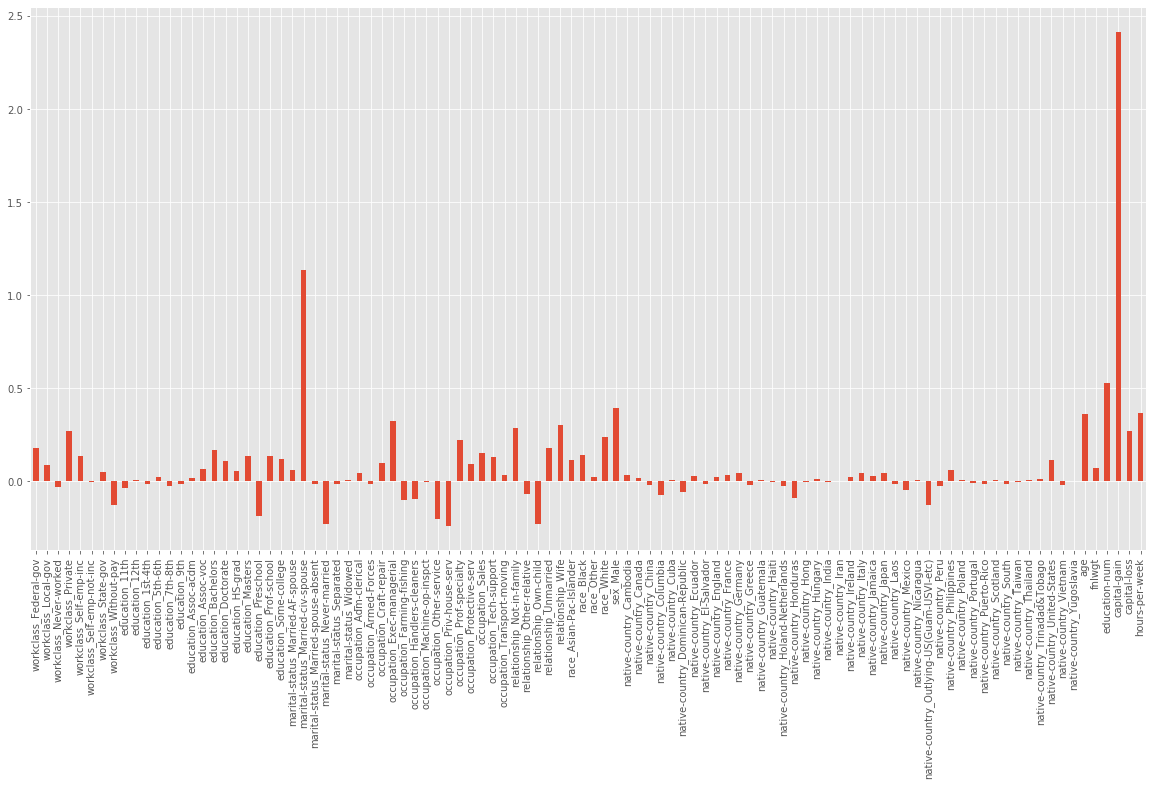

In [68]:
# now let's make a pandas Series with the names and values, and plot them
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.figure(figsize = (20,10))
weights = pd.Series(model_logit.coef_[0],index=design_adult.columns)
weights.plot(kind='bar')
plt.show()

In [77]:
from math import exp, expm1
(exp(0.36)-1)*100

43.332941456034014